# 2487 Machine Learning Assignment 4
#Inside Out
![](https://upload.wikimedia.org/wikipedia/en/0/0a/Inside_Out_%282015_film%29_poster.jpg)




Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise.

Your task is to use deep learning techniques to classify the Tweets into the corresponding emotions:

In [24]:
# Install compatible versions of TensorFlow and TensorFlow Hub
!pip install tensorflow==2.13.0 tensorflow_hub==0.13.0 tensorflow_text


In [1]:
!pip install datasets transformers

In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Gensim for pre-trained word embeddings
import gensim.downloader as api

# Load the dataset
from datasets import load_dataset
emotion = load_dataset('emotion')

# Define a function to vectorize the text data (if needed)
def vectorize_text(text, label):
    # Add your vectorization logic here
    return text, label

# Optional imports for BERT and other advanced models (commented out)
# import tensorflow_hub as hub
# import tensorflow_text as text


/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [3]:
emotion = load_dataset("dair-ai/emotion")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Data Fields

The data fields are:

- text: a string feature.
- label: a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5).

In [4]:
emotion['train'][0]['text'],emotion['train'][0]['label'],emotion['train'].features

('i didnt feel humiliated',
 0,
 {'text': Value(dtype='string', id=None),
  'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)})

In [6]:
emotion['validation'][0]['text'],emotion['validation'][0]['label']

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [5]:
emotion['test'][0]['text'],emotion['test'][0]['label']

('im feeling rather rotten so im not very ambitious right now', 0)

split: with a total of 20_000 examples split into train, validation and split

In [7]:
emotion['train'].shape, emotion['validation'].shape, emotion['test'].shape

((16000, 2), (2000, 2), (2000, 2))

## Question 1 (40 points)
Check the distribution of the text length in the data, build the simple RNN model and LSTM model with one layer, and two stacked layers, respectively and compare their performance. You may choose to pad or truncate the input sequence to be the number closest to 128, 256, 512, etc. You could train at most for 10 epochs if you find it takes much time.

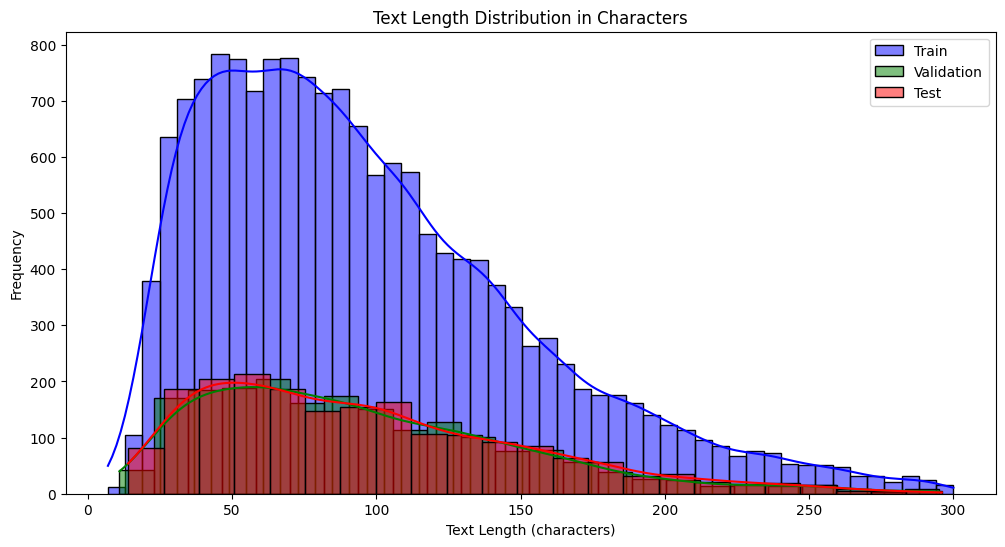

In [10]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each text in characters for each split
train_text_lengths = train_df['text'].apply(len)
val_text_lengths = val_df['text'].apply(len)
test_text_lengths = test_df['text'].apply(len)

# Create a DataFrame for the lengths
lengths_df = pd.DataFrame({
    'train': train_text_lengths,
    'validation': val_text_lengths,
    'test': test_text_lengths
})

# Plot the distribution of text lengths
plt.figure(figsize=(12, 6))
sns.histplot(lengths_df['train'], label='Train', color='blue', kde=True)
sns.histplot(lengths_df['validation'], label='Validation', color='green', kde=True)
sns.histplot(lengths_df['test'], label='Test', color='red', kde=True)
plt.title('Text Length Distribution in Characters')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [9]:
# Install the necessary libraries if not already installed
# !pip install datasets tensorflow

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from datasets import load_dataset

# Convert the dataset to pandas DataFrame
train_df = emotion['train'].to_pandas()
val_df = emotion['validation'].to_pandas()
test_df = emotion['test'].to_pandas()

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['text'])

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
val_sequences = tokenizer.texts_to_sequences(val_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

# Define the maximum sequence length
max_sequence_length = 128

# Pad or truncate sequences
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_val = pad_sequences(val_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Convert labels to numpy arrays
y_train = train_df['label'].values
y_val = val_df['label'].values
y_test = test_df['label'].values

# Define the number of classes
num_classes = len(np.unique(y_train))

# Build the LSTM model with one layer
def build_lstm_model_1_layer(vocab_size, embedding_dim, input_length, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=input_length),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build the LSTM model with two stacked layers
def build_lstm_model_2_layers(vocab_size, embedding_dim, input_length, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=input_length),
        tf.keras.layers.LSTM(128, return_sequences=True),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

# Train and evaluate the LSTM model with one layer
model_1_layer = build_lstm_model_1_layer(vocab_size, embedding_dim, max_sequence_length, num_classes)
history_1_layer = model_1_layer.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

# Train and evaluate the LSTM model with two stacked layers
model_2_layers = build_lstm_model_2_layers(vocab_size, embedding_dim, max_sequence_length, num_classes)
history_2_layers = model_2_layers.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

# Evaluate the models on the test set
y_pred_1_layer = np.argmax(model_1_layer.predict(X_test), axis=-1)
y_pred_2_layers = np.argmax(model_2_layers.predict(X_test), axis=-1)

# Calculate and display classification report for both models
report_1_layer = classification_report(y_test, y_pred_1_layer, target_names=emotion['train'].features['label'].names, output_dict=True)
report_2_layers = classification_report(y_test, y_pred_2_layers, target_names=emotion['train'].features['label'].names, output_dict=True)

print("Classification Report for LSTM Model with One Layer:")
print(classification_report(y_test, y_pred_1_layer, target_names=emotion['train'].features['label'].names))

print("\nClassification Report for LSTM Model with Two Stacked Layers:")
print(classification_report(y_test, y_pred_2_layers, target_names=emotion['train'].features['label'].names))

# Extract and compare weighted average metrics
weighted_avg_metrics_1_layer = report_1_layer['weighted avg']
weighted_avg_metrics_2_layers = report_2_layers['weighted avg']

print(f"\nWeighted Average Metrics for LSTM Model with One Layer: {weighted_avg_metrics_1_layer}")
print(f"Weighted Average Metrics for LSTM Model with Two Stacked Layers: {weighted_avg_metrics_2_layers}")

# Extract and compare overall accuracy
accuracy_1_layer = report_1_layer['accuracy']
accuracy_2_layers = report_2_layers['accuracy']

print(f"\nOverall Accuracy for LSTM Model with One Layer: {accuracy_1_layer}")
print(f"Overall Accuracy for LSTM Model with Two Stacked Layers: {accuracy_2_layers}")


Epoch 1/10
250/250 [==============================] - 24s 90ms/step - loss: 1.2586 - accuracy: 0.5228 - val_loss: 0.7736 - val_accuracy: 0.7725
Epoch 2/10
250/250 [==============================] - 21s 86ms/step - loss: 0.3466 - accuracy: 0.8865 - val_loss: 0.3007 - val_accuracy: 0.8980
Epoch 3/10
250/250 [==============================] - 22s 86ms/step - loss: 0.1399 - accuracy: 0.9526 - val_loss: 0.2499 - val_accuracy: 0.9170
Epoch 4/10
250/250 [==============================] - 22s 86ms/step - loss: 0.0857 - accuracy: 0.9707 - val_loss: 0.2425 - val_accuracy: 0.9165
Epoch 5/10
250/250 [==============================] - 21s 85ms/step - loss: 0.0661 - accuracy: 0.9793 - val_loss: 0.3028 - val_accuracy: 0.9125
Epoch 6/10
250/250 [==============================] - 21s 86ms/step - loss: 0.0548 - accuracy: 0.9815 - val_loss: 0.2836 - val_accuracy: 0.9175
Epoch 7/10
250/250 [==============================] - 21s 86ms/step - loss: 0.0421 - accuracy: 0.9858 - val_loss: 0.2601 - val_accuracy:

In [11]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from datasets import load_dataset

# Convert the dataset to pandas DataFrame
train_df = emotion['train'].to_pandas()
val_df = emotion['validation'].to_pandas()
test_df = emotion['test'].to_pandas()

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['text'])

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
val_sequences = tokenizer.texts_to_sequences(val_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

# Define the maximum sequence length
max_sequence_length = 128

# Pad or truncate sequences
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_val = pad_sequences(val_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Convert labels to numpy arrays
y_train = train_df['label'].values
y_val = val_df['label'].values
y_test = test_df['label'].values

# Define the number of classes
num_classes = len(np.unique(y_train))

# Build the RNN model with one layer
def build_rnn_model_1_layer(vocab_size, embedding_dim, input_length, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=input_length),
        tf.keras.layers.SimpleRNN(128),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build the RNN model with two stacked layers
def build_rnn_model_2_layers(vocab_size, embedding_dim, input_length, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=input_length),
        tf.keras.layers.SimpleRNN(128, return_sequences=True),
        tf.keras.layers.SimpleRNN(128),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

# Train and evaluate the RNN model with one layer
model_1_layer = build_rnn_model_1_layer(vocab_size, embedding_dim, max_sequence_length, num_classes)
history_1_layer = model_1_layer.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

# Train and evaluate the RNN model with two stacked layers
model_2_layers = build_rnn_model_2_layers(vocab_size, embedding_dim, max_sequence_length, num_classes)
history_2_layers = model_2_layers.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

# Evaluate the models on the test set
y_pred_1_layer = np.argmax(model_1_layer.predict(X_test), axis=-1)
y_pred_2_layers = np.argmax(model_2_layers.predict(X_test), axis=-1)

# Calculate and display classification report for both models
report_1_layer = classification_report(y_test, y_pred_1_layer, target_names=emotion['train'].features['label'].names, output_dict=True)
report_2_layers = classification_report(y_test, y_pred_2_layers, target_names=emotion['train'].features['label'].names, output_dict=True)

print("Classification Report for RNN Model with One Layer:")
print(classification_report(y_test, y_pred_1_layer, target_names=emotion['train'].features['label'].names))

print("\nClassification Report for RNN Model with Two Stacked Layers:")
print(classification_report(y_test, y_pred_2_layers, target_names=emotion['train'].features['label'].names))

# Extract and compare weighted average metrics
weighted_avg_metrics_1_layer = report_1_layer['weighted avg']
weighted_avg_metrics_2_layers = report_2_layers['weighted avg']

print(f"\nWeighted Average Metrics for RNN Model with One Layer: {weighted_avg_metrics_1_layer}")
print(f"Weighted Average Metrics for RNN Model with Two Stacked Layers: {weighted_avg_metrics_2_layers}")

# Extract and compare overall accuracy
accuracy_1_layer = report_1_layer['accuracy']
accuracy_2_layers = report_2_layers['accuracy']

print(f"\nOverall Accuracy for RNN Model with One Layer: {accuracy_1_layer}")
print(f"Overall Accuracy for RNN Model with Two Stacked Layers: {accuracy_2_layers}")


Epoch 1/10
250/250 [==============================] - 10s 34ms/step - loss: 1.5174 - accuracy: 0.3889 - val_loss: 1.3112 - val_accuracy: 0.5045
Epoch 2/10
250/250 [==============================] - 8s 34ms/step - loss: 0.7777 - accuracy: 0.7355 - val_loss: 0.7679 - val_accuracy: 0.7380
Epoch 3/10
250/250 [==============================] - 8s 33ms/step - loss: 0.2571 - accuracy: 0.9231 - val_loss: 0.7947 - val_accuracy: 0.7625
Epoch 4/10
250/250 [==============================] - 8s 33ms/step - loss: 0.8088 - accuracy: 0.7321 - val_loss: 1.2939 - val_accuracy: 0.6395
Epoch 5/10
250/250 [==============================] - 8s 34ms/step - loss: 0.5244 - accuracy: 0.8310 - val_loss: 0.9372 - val_accuracy: 0.7225
Epoch 6/10
250/250 [==============================] - 8s 34ms/step - loss: 0.6015 - accuracy: 0.7909 - val_loss: 1.0961 - val_accuracy: 0.6105
Epoch 7/10
250/250 [==============================] - 8s 33ms/step - loss: 0.2523 - accuracy: 0.9213 - val_loss: 0.9909 - val_accuracy: 0.730

We can see that the LSTM with an weighted avg accuracy of 0.92 was the best model. Which we can see is that sadness is the easiest for the models to recognized followed by joy.

## Question 2 (30 points)

Now download the pretrained word embedding models from Gensim library with different embedding size 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200'. Show the most similar words for `anger, fear, joy, love, sadness, and surprise`. Use the best performing model from the Quesetion 1 and replace the embedding layer with pretrained word embeddings with different embedding size. Explain whether these pretrained embedding would imporve the model performance.


In [12]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [32]:
# Load GloVe models from the Twitter corpus with different embedding dimensions
glove_models = {
    '25': api.load('glove-twitter-25'),
    '50': api.load('glove-twitter-50'),
    '100': api.load('glove-twitter-100'),
    '200': api.load('glove-twitter-200')
}

# List of emotions to find similar words for
emotions = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

# Create a dictionary to store similar words for each emotion at different embedding sizes
similar_words = {
    size: {emotion: model.most_similar(emotion, topn=5) for emotion in emotions}
    for size, model in glove_models.items()
}

# Print the most similar words for each emotion and embedding size
for size, words in similar_words.items():
    print(f"Embedding Size: {size}")
    for emotion, similarities in words.items():
        print(f"{emotion.capitalize()}: {similarities}")
    print("\n")


Embedding Size: 25
Anger: [('fear', 0.9505937695503235), ('frustration', 0.9350658059120178), ('emotions', 0.9121993780136108), ('pain', 0.9061965346336365), ('emotion', 0.9021011590957642)]
Fear: [('anger', 0.9505937695503235), ('enemy', 0.9229838252067566), ('afraid', 0.9117358922958374), ('destroy', 0.9105901122093201), ('fears', 0.9076415300369263)]
Joy: [('dreams', 0.9211523532867432), ('faith', 0.9142656922340393), ('grace', 0.9103144407272339), ('happiness', 0.908566415309906), ('spirit', 0.9064580202102661)]
Love: [('you', 0.9448828101158142), ('baby', 0.9425430297851562), ('dream', 0.9267040491104126), ('miss', 0.9246909022331238), ('much', 0.9215252995491028)]
Sadness: [('heartbreak', 0.9222661852836609), ('laughter', 0.9163241982460022), ('sorrow', 0.916123628616333), ('heartache', 0.9138960242271423), ('misery', 0.9085743427276611)]
Surprise: [('date', 0.8957765102386475), ('valentine', 0.8720001578330994), ('present', 0.8664577603340149), ('minute', 0.8637888431549072), ('

In [31]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
import gensim.downloader as api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from datasets import load_dataset

# Load the emotion dataset
emotion = load_dataset('emotion')

# Define the GloVe Twitter models to be used
glove_models = ['glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200']

# Set the maximum number of features and the maximum length of sequences
max_features = 10000
maxlen = 66
train_texts = [example['text'] for example in emotion['train']]

# Example sequences and labels (replace with your actual data)
X_train = emotion['train'].to_pandas()['text']
y_train = emotion['train'].to_pandas()['label']
X_val = emotion['validation'].to_pandas()['text']
y_val = emotion['validation'].to_pandas()['label']
X_test = emotion['test'].to_pandas()['text']
y_test = emotion['test'].to_pandas()['label']

# Tokenize the training texts
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_texts)

# Tokenize and pad the sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen)
X_val_padded = pad_sequences(X_val_sequences, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen)

for model_name in glove_models:
    print(f"Training model with {model_name} embeddings...")

    # Load the GloVe Twitter model
    glove_twitter = api.load(model_name)

    # Determine the embedding dimension from the model name
    embedding_dim = int(model_name.split('-')[-1])

    # Initialize the embedding matrix with zeros
    embedding_matrix = np.zeros((max_features, embedding_dim))

    # Populate the embedding matrix with GloVe embeddings
    for word, index in tokenizer.word_index.items():
        if index < max_features:
            if word in glove_twitter:
                embedding_vector = glove_twitter[word]
                embedding_matrix[index] = embedding_vector

    # Create an embedding layer with pre-trained GloVe weights
    pretrained_embedding_layer = Embedding(input_dim=max_features,
                                           output_dim=embedding_dim,
                                           weights=[embedding_matrix],
                                           input_length=maxlen,
                                           trainable=False)

    # Build the LSTM model using the pre-trained embedding layer
    model_lstm_pretrained = Sequential([
        pretrained_embedding_layer,
        LSTM(64),
        Dense(6, activation='softmax')
    ])

    # Compile the LSTM model with Adam optimizer and sparse categorical cross-entropy loss
    model_lstm_pretrained.compile(optimizer='adam',
                                  loss='sparse_categorical_crossentropy',
                                  metrics=['accuracy'])

    # Train the LSTM model
    history = model_lstm_pretrained.fit(
        X_train_padded, y_train,
        epochs=10,
        validation_data=(X_val_padded, y_val),
        batch_size=64
    )

    # Evaluate the model on the test data
    test_loss, test_accuracy = model_lstm_pretrained.evaluate(X_test_padded, y_test)
    print(f"Test Accuracy for {model_name}: {test_accuracy}")

    # Predict the labels for the test set
    y_pred = model_lstm_pretrained.predict(X_test_padded)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Generate the classification report
    target_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    report = classification_report(y_test, y_pred_classes, target_names=target_names, output_dict=False)

    # Print the classification report
    print(f"Classification Report for LSTM Model with {model_name} Embeddings:")
    print(report)
    print("\n" + "="*80 + "\n")


/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Training model with glove-twitter-25 embeddings...
Epoch 1/10
250/250 [==============================] - 8s 27ms/step - loss: 1.4653 - accuracy: 0.4381 - val_loss: 1.4038 - val_accuracy: 0.4650
Epoch 2/10
250/250 [==============================] - 6s 26ms/step - loss: 1.3022 - accuracy: 0.5008 - val_loss: 1.2143 - val_accuracy: 0.5270
Epoch 3/10
250/250 [==============================] - 6s 26ms/step - loss: 1.1798 - accuracy: 0.5408 - val_loss: 1.1214 - val_accuracy: 0.5665
Epoch 4/10
250/250 [==============================] - 6s 25ms/step - loss: 1.0801 - accuracy: 0.5806 - val_loss: 1.0234 - val_accuracy: 0.5960
Epoch 5/10
250/250 [==============================] - 6s 26ms/step - loss: 1.0037 - accuracy: 0.6093 - val_loss: 0.9819 - val_accuracy: 0.6245
Epoch 6/10
250/250 [==============================] - 6s 25ms/step - loss: 0.9373 - accuracy: 0.6346 - val_loss: 0.9194 - val_accuracy: 0.6350
Epoch 7/10
250/250 [==============================] - 6s 26ms/step - loss: 0.8841 - accurac

The best model before was the LSTM model with one layer. This model could not be improved by pretrained embedding.

We can see, that

## Question 3 (20 points)

Now load BERT models from TensorFlow Hub. Fine-tune it with the data and evaluate the model performance. Check how you can do it [here](https://www.tensorflow.org/text/tutorials/classify_text_with_bert)

In [26]:
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text as text  # Add this line
from datasets import load_dataset
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Load the emotion dataset
emotion = load_dataset('emotion')

# Extract texts and labels from the dataset
train_texts = [example['text'] for example in emotion['train']]
train_labels = [example['label'] for example in emotion['train']]
val_texts = [example['text'] for example in emotion['validation']]
val_labels = [example['label'] for example in emotion['validation']]
test_texts = [example['text'] for example in emotion['test']]
test_labels = [example['label'] for example in emotion['test']]

# Define the model name and the corresponding TensorFlow Hub URLs
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'
encoder_url = f"https://tfhub.dev/tensorflow/{bert_model_name}/2"
preprocess_url = f"https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

# Define the BertClassifier model
class BertClassifier(tf.keras.Model):
    def __init__(self):
        super(BertClassifier, self).__init__()
        self.preprocessor = hub.KerasLayer(preprocess_url)
        self.encoder = hub.KerasLayer(encoder_url, trainable=True)
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.classifier = tf.keras.layers.Dense(6, activation='softmax')

    def call(self, inputs):
        preprocessed_inputs = self.preprocessor(inputs)
        encoder_outputs = self.encoder(preprocessed_inputs)
        dropout_output = self.dropout(encoder_outputs['pooled_output'])
        return self.classifier(dropout_output)

# Instantiate the classifier model
classifier_model = BertClassifier()

# Compile the model with the Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric
classifier_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Create TensorFlow datasets from the training and validation data
train_dataset = tf.data.Dataset.from_tensor_slices((train_texts, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((val_texts, val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

# Train the model
history = classifier_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3
)

# Evaluate the model on the test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((test_texts, test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
test_loss, test_accuracy = classifier_model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}")

# Predict the labels for the test dataset
y_pred = classifier_model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert test labels to numpy array
y_true = np.array(test_labels)

# Calculate the weighted accuracy
unique_classes = np.unique(y_true)
class_weights = np.array([np.sum(y_true == cls) for cls in unique_classes]) / len(y_true)

# Calculate per-class accuracy
per_class_accuracy = np.array([accuracy_score(y_true[y_true == cls], y_pred_classes[y_true == cls]) for cls in unique_classes])

# Calculate weighted accuracy
weighted_accuracy = np.sum(per_class_accuracy * class_weights)

print(f"Weighted Accuracy: {weighted_accuracy}")

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=emotion['train'].features['label'].names)

# Print the classification report
print("Classification Report:")
print(report)


Epoch 1/3
500/500 [==============================] - 380s 743ms/step - loss: 0.5677 - accuracy: 0.7928 - val_loss: 0.1947 - val_accuracy: 0.9245
Epoch 2/3
500/500 [==============================] - 374s 747ms/step - loss: 0.1724 - accuracy: 0.9314 - val_loss: 0.1612 - val_accuracy: 0.9370
Epoch 3/3
63/63 [==============================] - 15s 232ms/step - loss: 0.1746 - accuracy: 0.9270
Test Accuracy: 0.9269999861717224
63/63 [==============================] - 16s 248ms/step
Weighted Accuracy: 0.9269999999999999
Classification Report:
              precision    recall  f1-score   support

     sadness       0.98      0.96      0.97       581
         joy       0.93      0.96      0.94       695
        love       0.86      0.72      0.78       159
       anger       0.95      0.92      0.93       275
        fear       0.85      0.98      0.91       224
    surprise       0.84      0.70      0.76        66

    accuracy                           0.93      2000
   macro avg       0.90  

The performance of the best model before (0.92 with the LSTM model with one layer) could be improved by 1% to 0.93.

# Question 4 (10 points)

Now let's try some state-of-the-art Large Language Models (LLM)! Cohere provides trial API for free and you may register and use the LLM. After you obtain the trial API, go to https://dashboard.cohere.com/playground/classify and see how the LLM-based classification works. You could choose several pretrained embedding models such as embed-engligh-2.0 or embed-engligh-3.0 and provide example training data. Evaluate the model performance.

In [33]:
!pip install -U cohere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

In [35]:
# Sample training data
import cohere
from cohere import ClassifyExample
from datasets import load_dataset

co = cohere.Client('A2f5Dt0nZJsKIoIW0WCtMs0iLjfqnsOVw5zHUFHt')

# Load the emotion dataset
emotion = load_dataset('emotion')

# Print dataset structure to debug
print(emotion)

# Ensure proper access to dataset features
label_descriptions = emotion['train'].features['label'].names
print("Label Descriptions:", label_descriptions)

# Sample inputs for classification
inputs = [
    "I am on cloud 9!",
    "Try to talk to me again and I will break your pencil!!",
    "I am about to cry"
]

# Create examples for classification
examples = [
    ClassifyExample(text=emotion['train'][i]['text'], label=label_descriptions[emotion['train'][i]['label']])
    for i in range(min(100, len(emotion['train'])))
]

print("Examples:", examples)
print("Inputs:", inputs)


/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})
Label Descriptions: ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
Examples: [ClassifyExample(text='i didnt feel humiliated', label='sadness'), ClassifyExample(text='i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', label='sadness'), ClassifyExample(text='im grabbing a minute to post i feel greedy wrong', label='anger'), ClassifyExample(text='i am ever feeling nostalgic about the fireplace i will know that it is still on the property', label='love'), ClassifyExample(text='i am feeling grouchy', label='anger'), ClassifyExample(text='ive been feeling a little burdened lately wasnt sure why that was', label='sadness'), ClassifyExample(text

In [36]:
# Classify the input texts using the provided model and examples
response = co.classify(
    model='embed-english-v2.0',
    inputs=inputs,
    examples=examples
)

# Print the confidence levels of the labels
print(f'The confidence levels of the labels are: {response.classifications}')
print(response)


The confidence levels of the labels are: [ClassifyResponseClassificationsItem(id='578564b4-371f-4e35-89da-d5506fa1708a', input='I am on cloud 9!', prediction='joy', predictions=['joy'], confidence=0.98215467, confidences=[0.98215467], labels={'anger': ClassifyResponseClassificationsItemLabelsValue(confidence=0.0006629752), 'fear': ClassifyResponseClassificationsItemLabelsValue(confidence=0.0018049178), 'joy': ClassifyResponseClassificationsItemLabelsValue(confidence=0.98215467), 'love': ClassifyResponseClassificationsItemLabelsValue(confidence=0.006446859), 'sadness': ClassifyResponseClassificationsItemLabelsValue(confidence=0.00038804451), 'surprise': ClassifyResponseClassificationsItemLabelsValue(confidence=0.008542519)}, classification_type='single-label'), ClassifyResponseClassificationsItem(id='39cdda0e-2145-4fc7-b781-3a93d7c58475', input='Try to talk to me again and I will break your pencil!!', prediction='joy', predictions=['joy'], confidence=0.95153666, confidences=[0.95153666]

In [37]:
# Iterate through the classifications and print the input text along with the top prediction
for i, classification in enumerate(response.classifications):
    print(classification.input, classification.predictions[0])


I am on cloud 9! joy
Try to talk to me again and I will break your pencil!! joy
I am about to cry sadness


In [38]:
# Example training data
import cohere
from cohere import ClassifyExample

co = cohere.Client('A2f5Dt0nZJsKIoIW0WCtMs0iLjfqnsOVw5zHUFHt')

# Sample inputs for classification
inputs = [
    "I am on cloud 9!",
    "You complete me, I want to spend the rest of my life with you as my partner",
    "I am about to cry"
]

# Retrieve the label names from the dataset
label_descriptions = emotion['train'].features['label'].names
print("Label Descriptions:", label_descriptions)

# Create classification examples from the training data
examples = [
    ClassifyExample(text=emotion['train'][i]['text'], label=label_descriptions[emotion['train'][i]['label']])
    for i in range(min(100, len(emotion['train'])))
]
print("Classification Examples:", examples)
print("Input Texts:", inputs)


Label Descriptions: ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
Classification Examples: [ClassifyExample(text='i didnt feel humiliated', label='sadness'), ClassifyExample(text='i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', label='sadness'), ClassifyExample(text='im grabbing a minute to post i feel greedy wrong', label='anger'), ClassifyExample(text='i am ever feeling nostalgic about the fireplace i will know that it is still on the property', label='love'), ClassifyExample(text='i am feeling grouchy', label='anger'), ClassifyExample(text='ive been feeling a little burdened lately wasnt sure why that was', label='sadness'), ClassifyExample(text='ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny', label='surprise'), ClassifyExample(text='i feel as confused about life as a teenager or as jaded as a year old man', label='fear'), ClassifyExam

In [40]:
# Perform classification using the specified model and input examples
response = co.classify(
    model='embed-english-light-v3.0',
    inputs=inputs,
    examples=examples
)

# Display the confidence levels of the predicted labels
print(f'Label Confidence: {response.classifications}')
print(response)


Label Confidence: [ClassifyResponseClassificationsItem(id='d1dab3fe-9fb1-412c-9359-ac022d19e2d9', input='i am on cloud 9!', prediction='joy', predictions=['joy'], confidence=0.41486898, confidences=[0.41486898], labels={'anger': ClassifyResponseClassificationsItemLabelsValue(confidence=0.17871678), 'fear': ClassifyResponseClassificationsItemLabelsValue(confidence=0.07425931), 'joy': ClassifyResponseClassificationsItemLabelsValue(confidence=0.41486898), 'love': ClassifyResponseClassificationsItemLabelsValue(confidence=0.08180201), 'sadness': ClassifyResponseClassificationsItemLabelsValue(confidence=0.19367865), 'surprise': ClassifyResponseClassificationsItemLabelsValue(confidence=0.056674287)}, classification_type='single-label'), ClassifyResponseClassificationsItem(id='b8491020-ad73-4524-89bb-4b785535cbf0', input='you complete me, i want to spend the rest of my life with you as my partner', prediction='joy', predictions=['joy'], confidence=0.53057504, confidences=[0.53057504], labels={